In [1]:
import finterstellar as fs
import pandas as pd
import numpy as np

In [2]:
vlu = fs.Valuation()   # 기초금융상품 평가모델 라이브러리
v = fs.Visualize()   # 그래프 라이브러리

In [3]:
T = pd.to_datetime('2019-06-13')
t0 = pd.to_datetime('today')
print(t0)
print(T)

2019-05-12 15:48:18.016641
2019-06-13 00:00:00


In [4]:
ttm = vlu.time_to_maturity(t0, T)   # 잔존만기 계산 함수
ttm

0.09126984126984126

In [5]:
def time_to_maturity(t0, T, y=252):
    t0 = pd.to_datetime(t0).date()
    T = pd.to_datetime(T).date()
    return ( np.busday_count(t0, T) / y )

In [6]:
time_to_maturity(t0, T, y=365)

0.06301369863013699

In [7]:
# S, K, ttm, r, sigma (기초자산가격, 행사가격, 잔존만기, 이자율, 변동성)
K = 300   # 행사가
r = 0.02   # 이자율
sigma = 0.15   # 변동성

In [8]:
S = 300   # 기초자산가격

In [9]:
# 콜옵션 가격
vlu.call_price(S, K, ttm, r, sigma)

5.6961271322398375

In [10]:
def call_price(S, K, ttm, r, sigma): 
    d1 = ( np.log(S / K) + (r + sigma**2 * 0.5) * ttm ) / ( sigma * np.sqrt(ttm) )
    d2 = ( np.log(S / K) + (r - sigma**2 * 0.5) * ttm ) / ( sigma * np.sqrt(ttm) )
    #d2 = d1 - sigma * sqrt(ttm) 도 같은 수식
    val = ( S * stats.norm.cdf(d1, 0.0, 1.0) ) - K * np.exp( -r * ttm ) * stats.norm.cdf(d2, 0.0, 1.0)    
    return (val)

In [11]:
# 콜옵션 델타
vlu.call_delta(S, K, ttm, r, sigma)

0.5250926089585236

In [12]:
def call_delta(S, K, ttm, r, sigma):
    d1 = ( np.log(S / K) + (r + sigma**2 * 0.5) * ttm ) / ( sigma * np.sqrt(ttm) )
    val = stats.norm.cdf(d1, 0.0, 1.0)
    return val

In [13]:
# 콜옵션 감마
vlu.gamma(S, K, ttm, r, sigma)

0.029286920278569762

In [14]:
def ndx(x):
    return ( np.exp( -1 * x**2 * 0.5 ) / np.sqrt(2 * np.pi) )

def gamma(S, K, ttm, r, sigma):
    d1 = ( np.log(S / K) + (r + sigma**2 * 0.5) * ttm ) / ( sigma * np.sqrt(ttm) )
    val = ( ndx(d1) ) / ( S * sigma * np.sqrt(ttm) )
    return val

In [15]:
# 풋옵션 가격
vlu.put_price(S, K, ttm, r, sigma)

5.149007591677218

In [16]:
def put_price(S, K, ttm, r, sigma):    
    d1 = ( np.log(S / K) + (r + sigma**2 * 0.5) * ttm ) / ( sigma * np.sqrt(ttm) )
    d2 = ( np.log(S / K) + (r - sigma**2 * 0.5) * ttm ) / ( sigma * np.sqrt(ttm) )
    val = K * np.exp( -r * ttm ) * stats.norm.cdf(-d2, 0.0, 1.0) - ( S * stats.norm.cdf(-d1, 0.0, 1.0) ) 
    return val

In [17]:
# 풋옵션 델타
vlu.put_delta(S, K, ttm, r, sigma)

-0.4749073910414764

In [18]:
def put_delta(S, K, ttm, r, sigma):
    d1 = ( np.log(S / K) + (r + sigma**2 * 0.5) * ttm ) / ( sigma * np.sqrt(ttm) )
    val = stats.norm.cdf(d1, 0.0, 1.0)  - 1
    return val

그래프로 보기

In [19]:
# 구간 지정
S = np.arange(250,350)

콜 롱

In [20]:
call = vlu.call_price(S, K, ttm, r, sigma)
call

array([9.54827222e-05, 1.40679769e-04, 2.05498006e-04, 2.97648208e-04,
       4.27532162e-04, 6.09051358e-04, 8.60613204e-04, 1.20636865e-03,
       1.67771684e-03, 2.31511282e-03, 3.17021347e-03, 4.30839373e-03,
       5.81165991e-03, 7.78197915e-03, 1.03450332e-02, 1.36543911e-02,
       1.78960783e-02, 2.32935002e-02, 3.01126577e-02, 3.86675643e-02,
       4.93257563e-02, 6.25137549e-02, 7.87223237e-02, 9.85113377e-02,
       1.22514066e-01, 1.51440664e-01, 1.86080648e-01, 2.27304164e-01,
       2.76061831e-01, 3.33382993e-01, 4.00372234e-01, 4.78204052e-01,
       5.68115622e-01, 6.71397665e-01, 7.89383454e-01, 9.23436103e-01,
       1.07493429e+00, 1.24525666e+00, 1.43576526e+00, 1.64778820e+00,
       1.88260212e+00, 2.14141464e+00, 2.42534745e+00, 2.73542018e+00,
       3.07253569e+00, 3.43746702e+00, 3.83084624e+00, 4.25315570e+00,
       4.70472162e+00, 5.18571032e+00, 5.69612713e+00, 6.23581789e+00,
       6.80447299e+00, 7.40163389e+00, 8.02670176e+00, 8.67894808e+00,
      

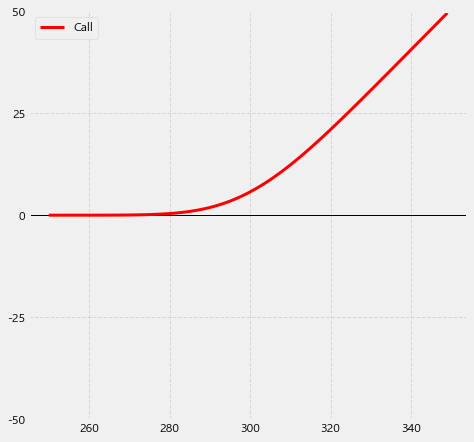

In [21]:
v.square_one_to_one_view(S, Call = call)

In [22]:
delta = vlu.call_delta(S, K, ttm, r, sigma)

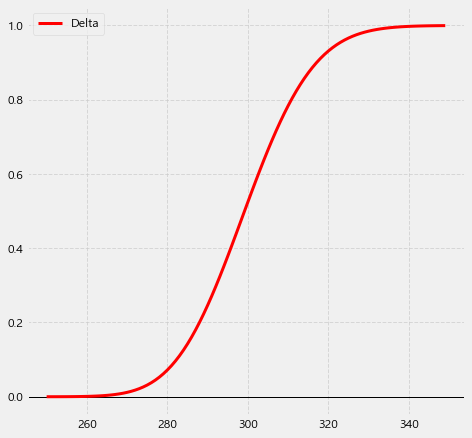

In [23]:
v.square_free_plot_view(S, Delta = delta)

In [24]:
gamma = vlu.gamma(S, K, ttm, r, sigma)

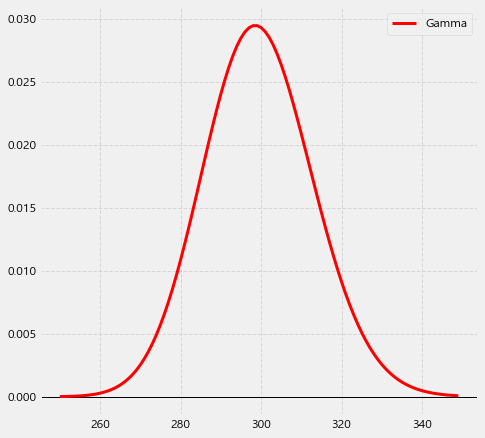

In [25]:
v.square_free_plot_view(S, Gamma = gamma)

풋 롱

In [26]:
put = vlu.put_price(S, K, ttm, r, sigma)

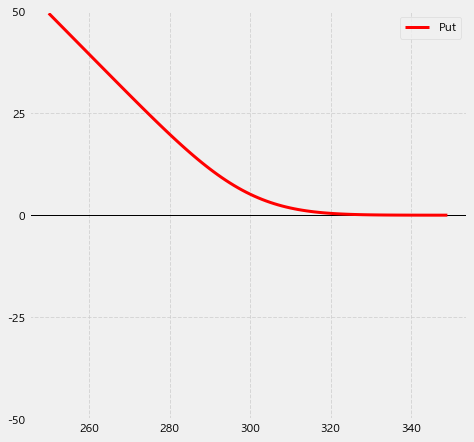

In [27]:
v.square_one_to_one_view(S, Put = put)

In [28]:
delta = vlu.put_delta(S, K, ttm, r, sigma)

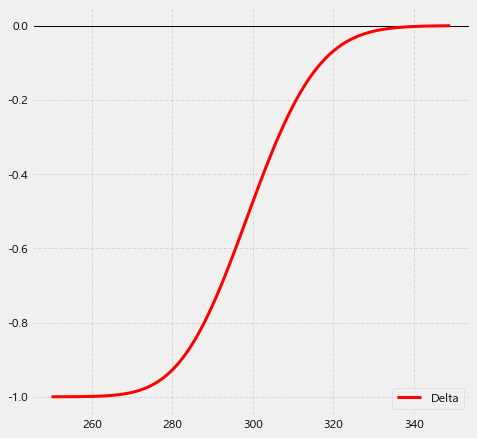

In [29]:
v.square_free_plot_view(S, Delta = delta)

In [30]:
gamma = vlu.gamma(S, K, ttm, r, sigma)

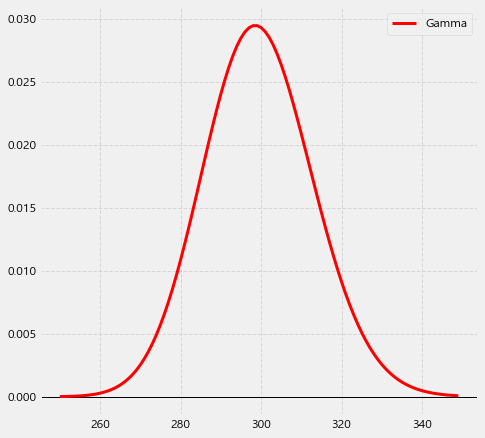

In [31]:
v.square_free_plot_view(S, Gamma = gamma)

콜 숏

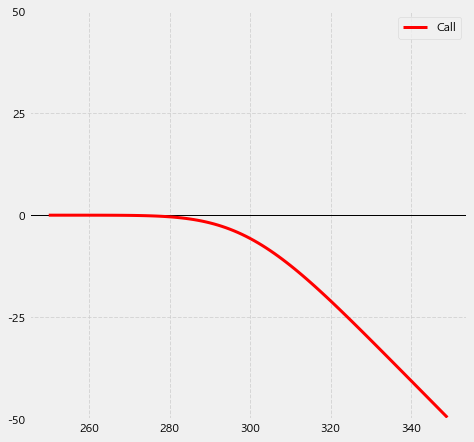

In [32]:
call = vlu.call_price(S, K, ttm, r, sigma) * -1
v.square_one_to_one_view(S, Call = call)

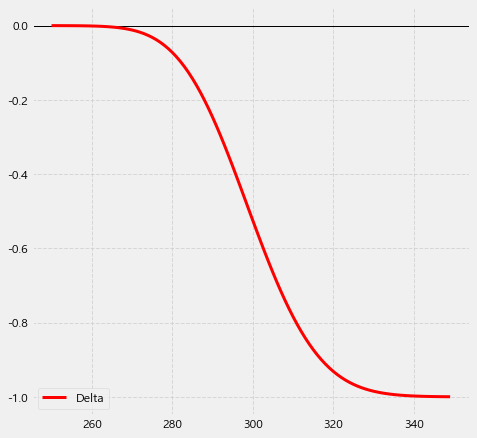

In [33]:
delta = vlu.call_delta(S, K, ttm, r, sigma) * -1
v.square_free_plot_view(S, Delta = delta)

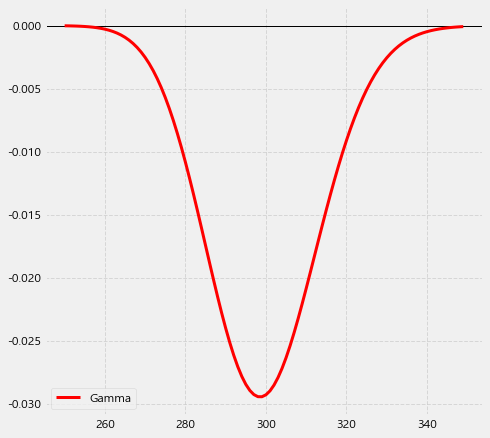

In [34]:
gamma = vlu.gamma(S, K, ttm, r, sigma) * -1
v.square_free_plot_view(S, Gamma = gamma)

풋 숏

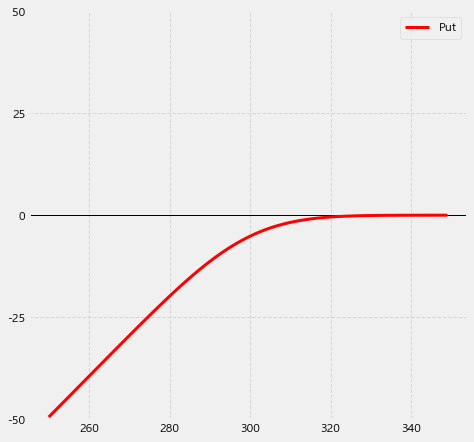

In [35]:
put = vlu.put_price(S, K, ttm, r, sigma) * -1
v.square_one_to_one_view(S, Put = put)

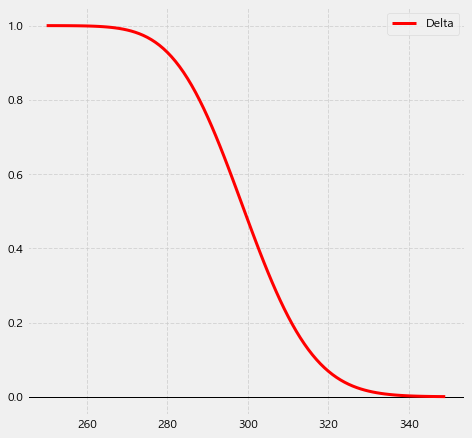

In [36]:
delta = vlu.put_delta(S, K, ttm, r, sigma) * -1
v.square_free_plot_view(S, Delta = delta)

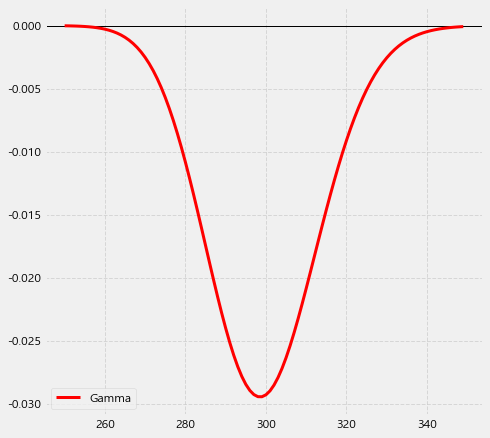

In [37]:
gamma = vlu.gamma(S, K, ttm, r, sigma) * -1
v.square_free_plot_view(S, Gamma = gamma)

내재변동성

In [38]:
S = 300

In [39]:
vlu.implied_vol_call(S, K, ttm, r, sigma, 6.315734067807512)

0.16716953610311402

In [ ]:
def implied_vol_call(S, K, ttm, r, sigma, C, repeat=100):
    for i in range(repeat):
        sigma = sigma - ( (call_price(S, K, ttm, r, sigma) - C) / vega(S, K, ttm, r, sigma) )
    return sigma

In [ ]:
vlu.implied_vol_put(S, K, ttm, r, sigma, 5.568340225948219)

In [ ]:
def implied_vol_put(S, K, ttm, r, sigma, P, repeat=100):
    for i in range(repeat):
        sigma = sigma - ( (put_price(S, K, ttm, r, sigma) - P) / vega(S, K, ttm, r, sigma) )
    return sigma